**Name** : Bodhisatya Ghosh \
**Class** : CSE DS \
**UID** : 2021700026 \
**Subject** : BAP \
**Experiment number** : 2

In [109]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [110]:
data = pd.read_csv('../exp 1/penguins_lter.csv')

In [111]:
data.drop(columns=['studyName','Individual ID','Comments'], inplace=True)
data.head(1)

,Sample Number,Species,Region,Island,Stage,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN


In [112]:
data.isna().sum()

Sample Number           0
Species                 0
Region                  0
Island                  0
Stage                   0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

### 1. Handle missing values by imputing them with mean, median, or mode. Reason out which is more suitable (mean, median or mode) for your dataset and which is not

In [113]:
data_mean = data[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']].fillna(data[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']].mean())

In [114]:
data_median = data[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']].fillna(data[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']].median())

In [115]:
data_mode = data[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)','Sex']].fillna(data[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)','Sex']].mode())

from sklearn.impute import SimpleImputer

freqImputer = SimpleImputer(strategy='most_frequent')
data_mode = freqImputer.fit_transform(data[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']])

In [116]:
data_mode

array([[  39.1    ,   18.7    ,  181.     , 3750.     ,    7.6322 ,
         -27.01854],
       [  39.5    ,   17.4    ,  186.     , 3800.     ,    8.94956,
         -24.69454],
       [  40.3    ,   18.     ,  195.     , 3250.     ,    8.36821,
         -25.33302],
       ...,
       [  50.4    ,   15.7    ,  222.     , 5750.     ,    8.30166,
         -26.04117],
       [  45.2    ,   14.8    ,  212.     , 5200.     ,    8.24246,
         -26.11969],
       [  49.9    ,   16.1    ,  213.     , 5400.     ,    8.3639 ,
         -26.15531]])

In [117]:
def compare(parameter):
    plt.figure(figsize=(10,6))
    
    plt.subplot(1,4,1)
    sns.kdeplot(data=data[parameter],color='red')
    sns.kdeplot(data=data_mean[parameter],color='blue')

    plt.subplot(1,4,2)
    sns.kdeplot(data=data[parameter],color='red')
    sns.kdeplot(data=data_median[parameter],color='yellow')

    plt.subplot(1,4,3)
    sns.kdeplot(data=data[parameter],color='red')
    sns.kdeplot(data=data_mode.flatten(),color='green')

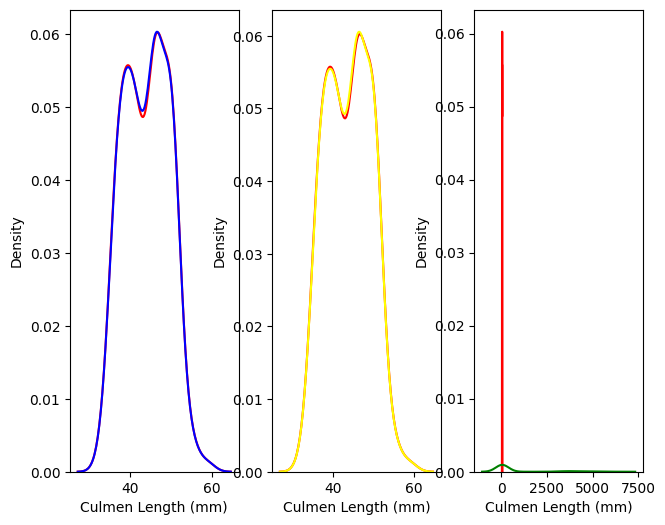

In [118]:
compare('Culmen Length (mm)')

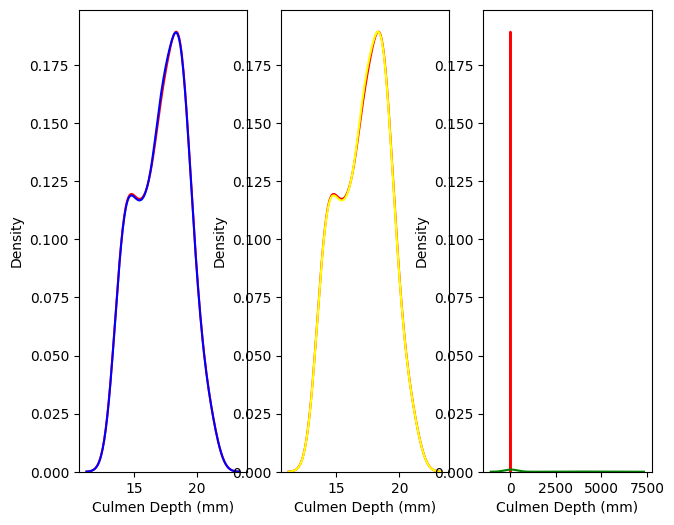

In [119]:
compare('Culmen Depth (mm)')

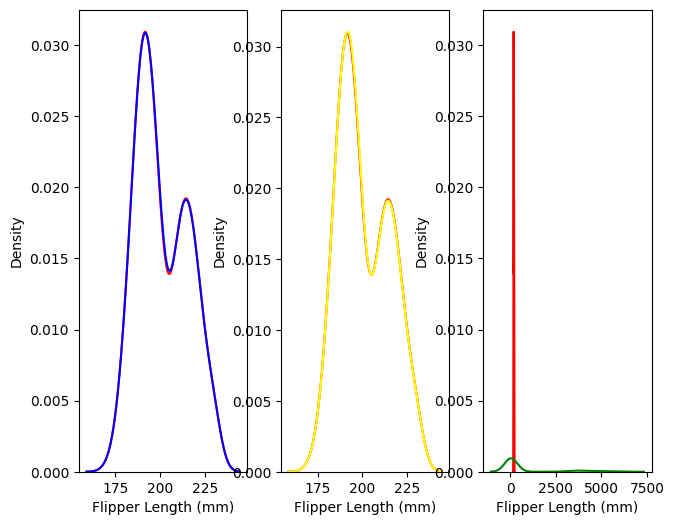

In [120]:
compare('Flipper Length (mm)')

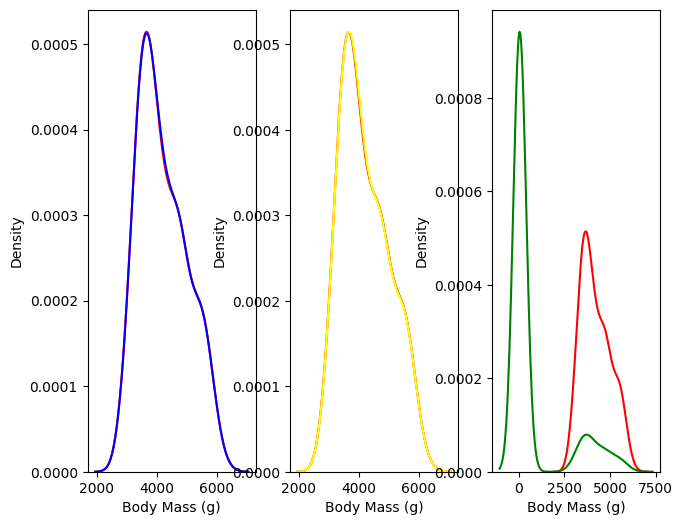

In [121]:
compare('Body Mass (g)')

### As we can see, using Mode to replace missing values produces least deviation from original data, hence, mode will be used as .fillna() parameter

In [122]:
data.fillna(data[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']].mode(),inplace=True)
data.fillna(data['Delta 13 C (o/oo)'].mode(),inplace=True)
data.dropna(inplace=True)

### 2. Removing outliers based on a specific threshold. Give reasons for your choice of threshold. What do the outliers in your dataset tell you?

In [123]:
def plotBoxes(numerical):
    plt.figure(figsize=(10,20))
    cnt = 1
    for column in numerical:
        if(cnt>len(numerical)):
            break
        plt.subplot(3,2,cnt)
        plt.boxplot(numerical[column])
        plt.title(column)
        cnt+=1

In [124]:
numerical = data[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']]

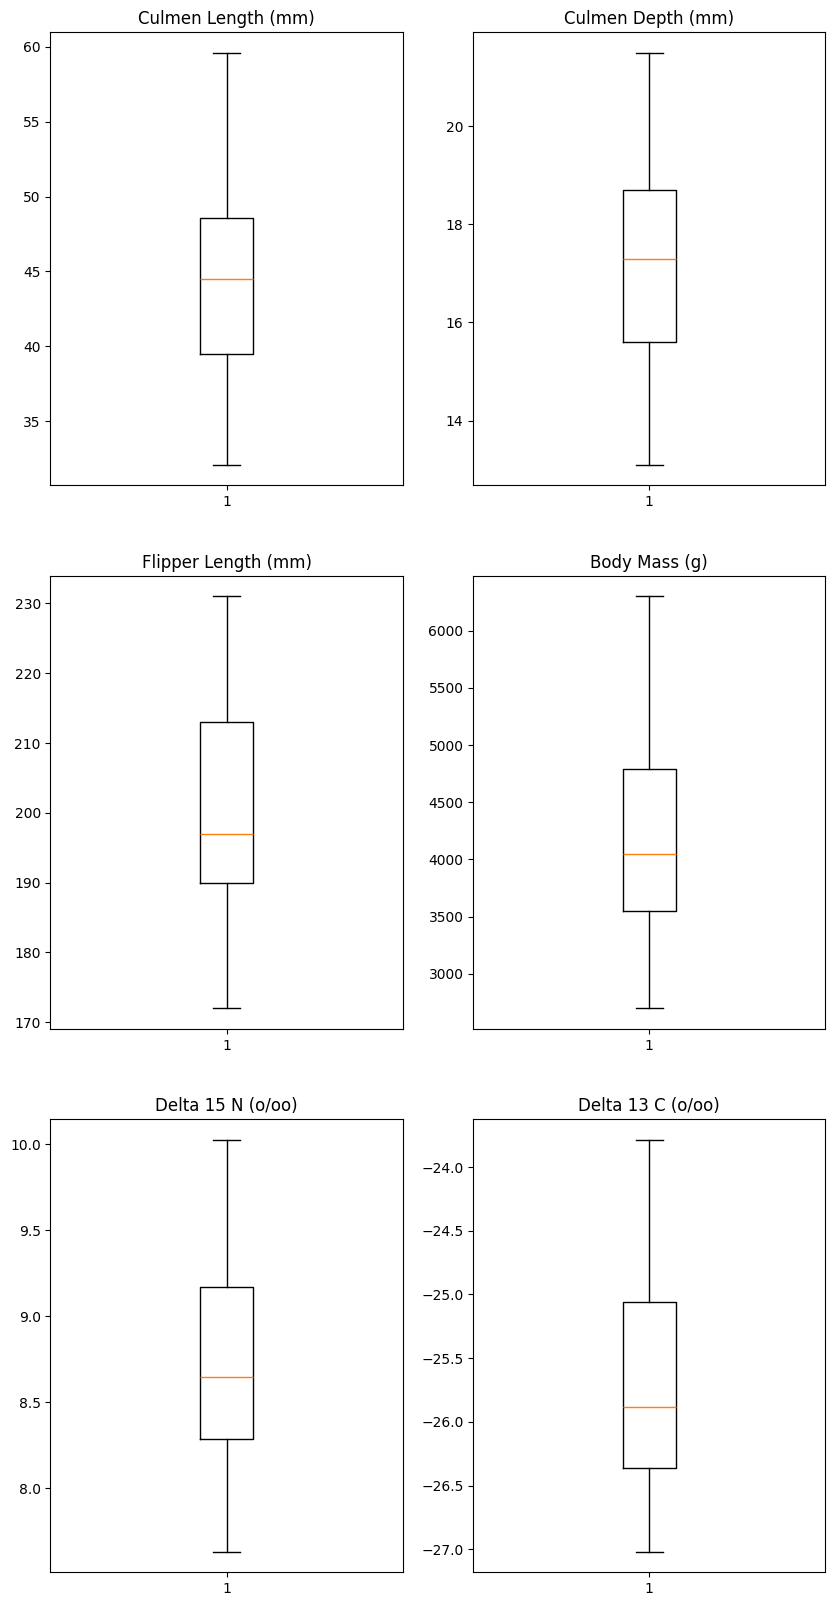

In [125]:
plotBoxes(numerical)

### As no outliers were found in the boxplots, no removal of outliers was needed

### 3. Transform variables using log transformation or standardization. What possibly can go wrong when you do not standardize your data? What are the reasons for using log transformation on your variables and when should you definitely use it?

In [126]:
from scipy.stats import norm 

In [127]:
def normalDist(data):
    plt.figure(figsize=(10,20))
    cnt = 1
    for column in data.columns:
        x_axis = np.array(data.loc[:,column])

        plt.subplot(3,2,cnt)

        sns.kdeplot(x_axis)
        plt.title(column)
        cnt+=1

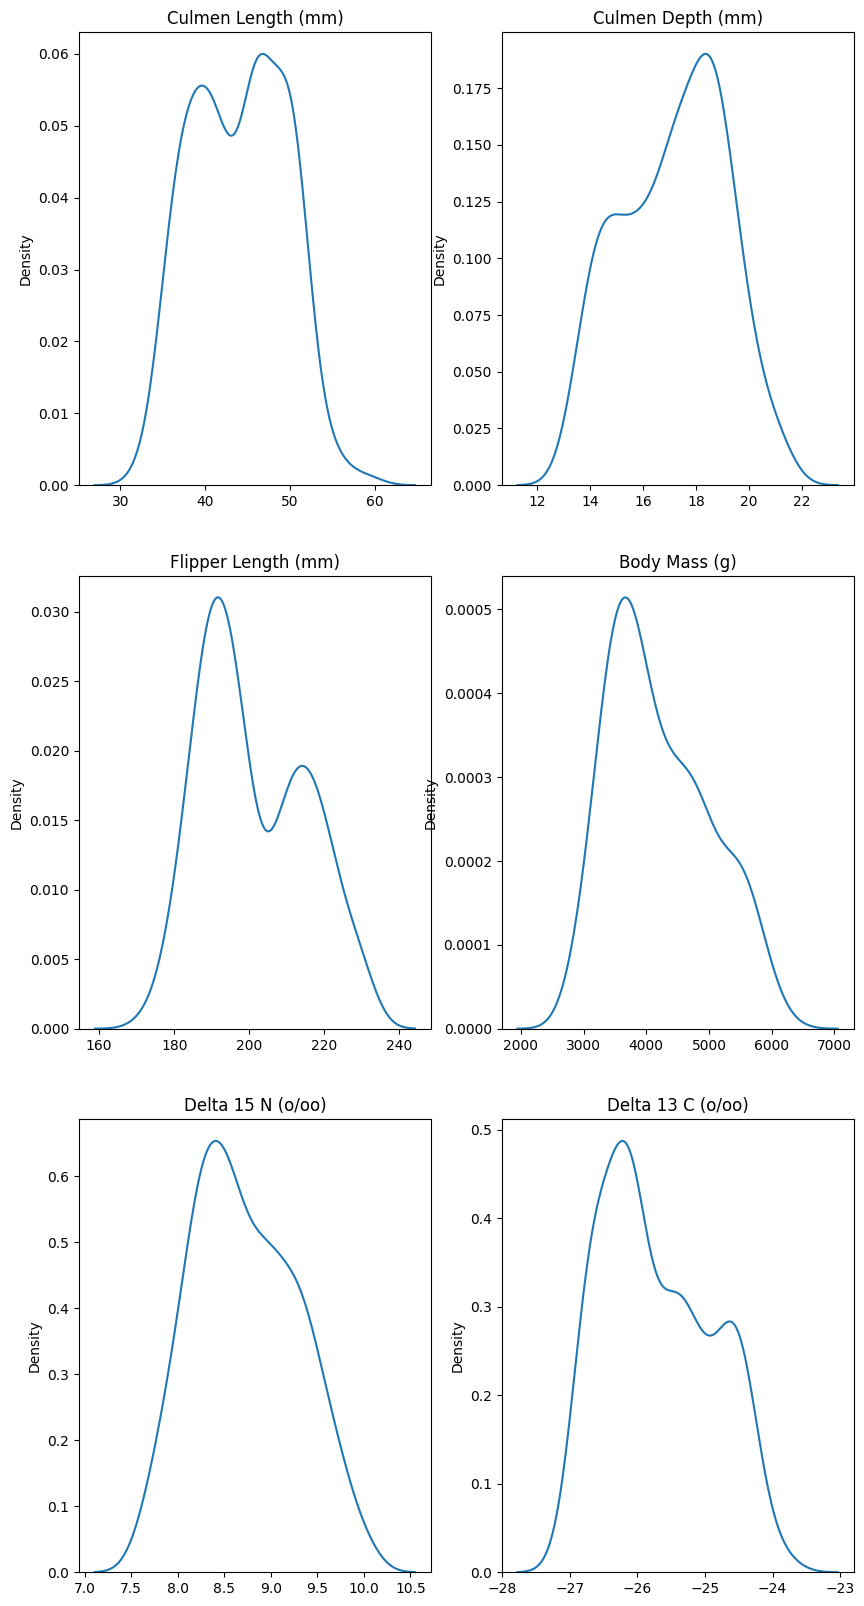

In [128]:
normalDist(numerical)

### Log Transformation Use Cases: 
### Skewed Data: When your data has a long tail or is positively skewed, log transformation can help normalize it. Multiplicative Relationships: Log transformation is also useful when there are multiplicative relationships between variables, convertin them into additive relationships.

### As we can see 'Culmen Length (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)' are all right skewed, hence we will use log transform

In [129]:
numericalLog = np.log10(data[['Culmen Length (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)']])
data[['Culmen Length (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)']] = numericalLog

### 4. Remove duplicate records from a data frame. (This process should be done before standardizing or scaling)

In [130]:
data.drop_duplicates(subset=['Sample Number'],keep='first',inplace=True)


### 5. Standardize date formats across your dataset.

In [131]:
data['Date Egg'] = pd.to_datetime(data['Date Egg']).dt.strftime("%d-%m-%y")
# data['Date Egg'] = data['Date Egg']

C:\Users\Rommel\AppData\Local\Temp\ipykernel_16204\173668251.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date Egg'] = pd.to_datetime(data['Date Egg']).dt.strftime("%d-%m-%y")


In [132]:
data['Date Egg']

0      11-11-07
1      11-11-07
2      16-11-07
4      16-11-07
5      16-11-07
         ...   
160    21-11-07
161    21-11-07
162    28-11-07
163    28-11-07
199    27-11-09
Name: Date Egg, Length: 152, dtype: object